# I. Time Series Data Handling (COVID-19)

In [ ]:
""" Package """
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd 

""" google drive mount """
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


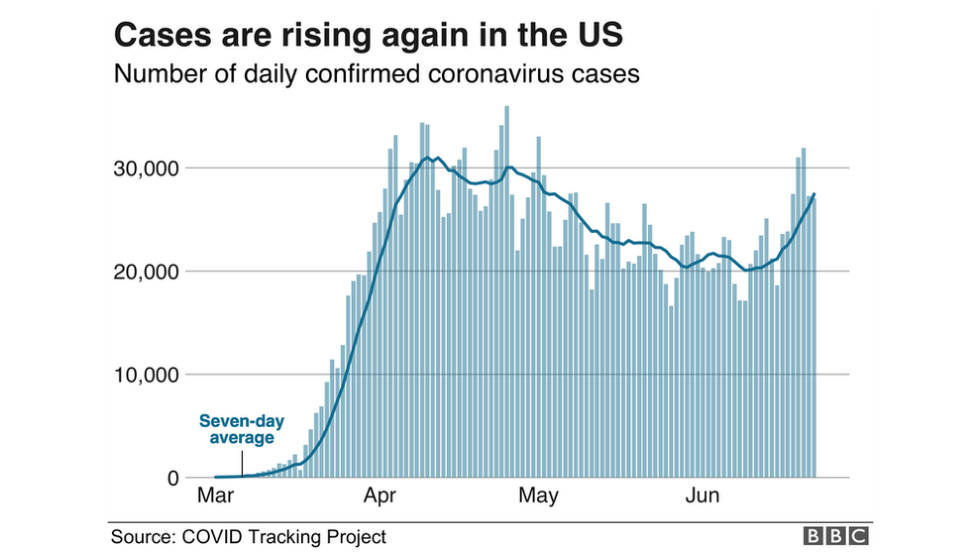

In [ ]:
asset_dir = '/content/gdrive/My Drive/Python_Programming/assets/'

column_pic = plt.imread(asset_dir + 'covid-us.png')
plt.axis('off')
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(column_pic)

### Load Dataset

In [ ]:
data_dir = '/content/gdrive/My Drive/Python_Programming/dataset/COVID-19/'

covid19_TS_confirmed = pd.read_csv(data_dir + 'time_series_covid_19_confirmed.csv')
covid19_TS_recovered = pd.read_csv(data_dir + 'time_series_covid_19_recovered.csv')
covid19_TS_death = pd.read_csv(data_dir + 'time_series_covid_19_deaths.csv')

### Dataset Check

In [ ]:
""" Confirmed """
covid19_TS_confirmed.head()

In [ ]:
""" Recovered """
covid19_TS_recovered.head()

In [ ]:
""" Death """
covid19_TS_death.head()

In [ ]:
print(covid19_TS_confirmed['Country/Region'].unique())
print(covid19_TS_confirmed['Country/Region'].value_counts())

## Example (1): A city in China

In [ ]:
selected_country = 'China'
China_confirmed = covid19_TS_confirmed[covid19_TS_confirmed['Country/Region'] == selected_country]
China_recovered = covid19_TS_recovered[covid19_TS_recovered['Country/Region'] == selected_country]
China_death = covid19_TS_death[covid19_TS_death['Country/Region'] == selected_country]

print(China_confirmed.columns)
China_confirmed.head()

In [ ]:
city_index = 0

## Plot Setting 
plt.rcParams["figure.figsize"] = (20,10)
plt.title('COVID19 - A city in China ('+ China_confirmed.iloc[city_index,0] + ')', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('COVID19 Numbers', fontsize=20)

## Plot
China_confirmed.iloc[city_index,4:].plot(c='blue') # index 0 = 'Anuhi'
China_recovered.iloc[city_index,4:].plot(c='green')
China_death.iloc[city_index,4:].plot(c='red')

## Example (2): All cities in China

In [ ]:
China_confirmed_sum, China_recovered_sum, China_death_sum = [], [], []

for i in range(4, len(China_confirmed.columns)):
  China_confirmed_sum.append(China_confirmed.iloc[:, i].sum())

for i in range(4, len(China_recovered.columns)):
  China_recovered_sum.append(China_recovered.iloc[:, i].sum())

for i in range(4, len(China_death.columns)):
  China_death_sum.append(China_death.iloc[:, i].sum())    

In [ ]:
## Plot Setting 
plt.rcParams["figure.figsize"] = (20,10)
plt.title('COVID19 - All cities in China', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('COVID19 Numbers', fontsize=20)

## Plot
line1, = plt.plot(China_confirmed_sum, 'b')
line2, = plt.plot(China_recovered_sum, 'g')
line3, = plt.plot(China_death_sum, 'r')
plt.legend(handles=(line1, line2, line3), labels=('Confirmed', 'Recovered', 'Death'), loc='upper right', fontsize= 20)

## Example (3): All cities in China (Accumulated)

In [ ]:
China_confirmed_sum, China_recovered_sum, China_death_sum = [], [], []

for i in range(4, len(China_confirmed.columns)):
  China_confirmed_sum.append(China_confirmed.iloc[:, i].sum())

for i in range(4, len(China_recovered.columns)):
  China_recovered_sum.append(China_recovered.iloc[:, i].sum())

for i in range(4, len(China_death.columns)):
  China_death_sum.append(China_death.iloc[:, i].sum())    

## Accumulation
import numpy as np
China_confirmed_cumsum = np.cumsum(China_confirmed_sum)  
China_recovered_cumsum = np.cumsum(China_recovered_sum)  
China_death_cumsum = np.cumsum(China_death_sum)  

In [ ]:
## Plot Setting 
plt.rcParams["figure.figsize"] = (20,10)
plt.title('COVID19 - All cities in China (Accumulated)', size=20)
plt.xlabel('Date', size=20)
plt.ylabel('COVID19 Numbers (Accumulated)', size=20)

## Plot
line1, = plt.plot(China_confirmed_cumsum, 'b')
line2, = plt.plot(China_recovered_cumsum, 'g')
line3, = plt.plot(China_death_cumsum, 'r')
plt.legend(handles=(line1, line2, line3), labels=('Confirmed (Accumulated)', 'Recovered (Accumulated)', 'Death (Accumulated)'), loc='upper right', fontsize= 20)

# II. Time Series Data Processing (COVID-19)

In [ ]:
################################
selected_country = 'Ireland' 
################################
confirmed = covid19_TS_confirmed[covid19_TS_confirmed['Country/Region'] == selected_country]
recovered = covid19_TS_recovered[covid19_TS_recovered['Country/Region'] == selected_country]
death = covid19_TS_death[covid19_TS_death['Country/Region'] == selected_country]

print(confirmed.columns)
confirmed.head()

In [ ]:
confirmed_sum, recovered_sum, death_sum = [], [], []

for i in range(4, len(confirmed.columns)):
  confirmed_sum.append(confirmed.iloc[:, i].sum())

for i in range(4, len(recovered.columns)):
  recovered_sum.append(recovered.iloc[:, i].sum())

for i in range(4, len(death.columns)):
  death_sum.append(death.iloc[:, i].sum()) 

In [ ]:
## Plot Setting 
plt.rcParams["figure.figsize"] = (20,10)
plt.title(selected_country + ' (Accumulated)', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('COVID19 Numbers', fontsize=20)

## Plot
line1, = plt.plot(confirmed_sum, 'b')
line2, = plt.plot(recovered_sum, 'g')
line3, = plt.plot(death_sum, 'r')

plt.legend(handles=(line1, line2, line3), labels=('Confirmed', 'Recovered', 'Death'), loc='upper right', fontsize= 20)

## 1. Interpolation

In [ ]:
COVID19_interp = pd.DataFrame({"confirmed": confirmed_sum})

COVID19_interp.plot(c='blue')
plt.legend(["Original"], fontsize=20)

#### Example (1)

In [ ]:
import numpy as np

## (1) 임의의 구간 nan 처리
COVID19_interp.loc[50:53, "confirmed"] = np.nan*3
COVID19_interp.loc[70:73, "confirmed"] = np.nan*3
COVID19_interp.loc[80:82, "confirmed"] = np.nan*2
COVID19_interp.loc[90:92, "confirmed"] = np.nan*2
COVID19_interp.loc[100:102, "confirmed"] = np.nan*2
COVID19_interp.loc[110:113, "confirmed"] = np.nan*3
COVID19_interp.loc[140:142, "confirmed"] = np.nan*2

COVID19_interp["confirmed"].plot(c='blue')
plt.legend(["Original with nan"], fontsize=20)

In [ ]:
## Interpolation
COVID19_interp_poly = COVID19_interp["confirmed"].interpolate(method='polynomial', order=2)
COVID19_interp_cubic = COVID19_interp["confirmed"].interpolate(method='cubic')

## Plot
COVID19_interp["confirmed"].plot(c='blue')
COVID19_interp_poly.plot(c='green')
COVID19_interp_cubic.plot(c='red')
plt.legend(["Original with nan", "Interpolated - polynomial", "Interpolated - cubic"], fontsize=20)

#### Example (2)

In [ ]:
## (2) 임의의 구간 nan 처리
COVID19_interp.loc[80:115, "confirmed"] = np.nan*35

COVID19_interp["confirmed"].plot(c='blue')
plt.legend(["Original with nan"], fontsize=20)

In [ ]:
## Interpolation
COVID19_interp_poly = COVID19_interp["confirmed"].interpolate(method='polynomial', order=2)
COVID19_interp_cubic = COVID19_interp["confirmed"].interpolate(method='cubic')

## Plot
COVID19_interp_poly.plot(c='blue')
COVID19_interp_cubic.plot(c='red')
plt.legend(["Original with nan", "Interpolation"], fontsize=20)

## 2. Moving Average

In [ ]:
confirmed_sum, recovered_sum, death_sum = [], [], []

for i in range(4, len(confirmed.columns)):
  confirmed_sum.append(confirmed.iloc[:, i].sum())

for i in range(4, len(recovered.columns)):
  recovered_sum.append(recovered.iloc[:, i].sum())

for i in range(4, len(death.columns)):
  death_sum.append(death.iloc[:, i].sum()) 

In [ ]:
COVID19_MovAvg = pd.DataFrame({'recovered': recovered_sum})

COVID19_MovAvg.plot(c='blue')
plt.legend(["Original"], fontsize=20)

In [ ]:
## Moving Average
#########
day = 7
#########
COVID19_MovAvg_sma = COVID19_MovAvg.rolling(day).mean() # sma: simple moving average
COVID19_MovAvg_ema = COVID19_MovAvg.ewm(day).mean() # ema: exponential moving average 


## Plot
ax = COVID19_MovAvg.plot(c='blue')
COVID19_MovAvg_sma.plot(ax=ax, c='green')
COVID19_MovAvg_ema.plot(ax=ax, c='red')

ax.legend(["Original", "SMA", "EMA"], fontsize=20)